In [1]:
%matplotlib inline
from matplotlib import style

style.use("fivethirtyeight")
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.types import Date, Time

import numpy as np
import pandas as pd
import datetime as dt
from pprint import pprint

%reload_ext nb_black

<IPython.core.display.Javascript object>

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

<IPython.core.display.Javascript object>

In [3]:
# set engine, connection, session, inspector
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
session = Session(bind=engine)
inspector = inspect(engine)

<IPython.core.display.Javascript object>

In [4]:
# reflect the tables
table_names = inspector.get_table_names()
for table_name in table_names:
    pprint(table_name)
    columns = inspector.get_columns(table_name)
    pprint(columns)

'measurement'
[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'date',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'prcp',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'tobs',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()}]
'station'
[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'name',
  'nullable': True,
  'primary_key': 0,

<IPython.core.display.Javascript object>

In [5]:
# view all of the classes
Base = declarative_base()

class measurement(Base):
    __tablename__ = "measurement"
    id = Column(Integer, primary_key=True)
    station_id = Column("station", String(20))
    date = Column(Date)
    rain = Column("prcp", Float)
    temp = Column("tobs", Float)


class station(Base):
    __tablename__ = "station"
    id = Column(Integer, primary_key=True)
    station = Column("station", String(20))
    name = Column("name", String(50))
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)

<IPython.core.display.Javascript object>

In [6]:
# Create our session (link) from Python to the DB
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
session = Session(bind=engine)

<IPython.core.display.Javascript object>

In [7]:
query = session.query(measurement).limit(5)
pprint(query)

<IPython.core.display.Javascript object>

In [8]:
query = session.query(station).limit(5)
pprint(query)

<IPython.core.display.Javascript object>

In [9]:
for row in query:
    pprint(row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f9bf809ec10>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f9bf8075250>,
 'elevation': 14.6,
 'id': 2,
 'latitude': 21.4234,
 'longitude': -157.8015,
 'name': 'KANEOHE 838.1, HI US',
 'station': 'USC00513117'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f9bf87b4050>,
 'elevation': 7.0,
 'id': 3,
 'latitude': 21.5213,
 'longitude': -157.8374,
 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'station': 'USC00514830'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f9bf87b40d0>,
 'elevation': 11.9,
 'id': 4,
 'latitude': 21.3934,
 'longitude': -157.9751,
 'name': 'PEARL CITY, HI US',
 'station': 'USC00517948'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f9bf87b4210>,
 'elevati

<IPython.core.display.Javascript object>

# Exploratory Climate Analysis

In [10]:
from sqlalchemy import func
from sqlalchemy.sql.expression import and_, extract

<IPython.core.display.Javascript object>

In [11]:
# find the min and max date
min_date, max_date = session.query(
    func.min(measurement.date), func.max(measurement.date)
).first()
print(min_date, max_date)

2010-01-01 2017-08-23


<IPython.core.display.Javascript object>

In [12]:
# Calculate the date 1 year ago from the last data point in the database
from dateutil.relativedelta import relativedelta
import datetime

# years_ago = datetime.datetime.now() - relativedelta(years=5)

# last 12 months
start_date = max_date - relativedelta(years=1)
end_date = max_date
print(start_date, end_date)

2016-08-23 2017-08-23


<IPython.core.display.Javascript object>

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
data = session.query(measurement.date, measurement.rain).filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()
for info in data:
    print(info)

(datetime.date(2016, 8, 23), 0.0)
(datetime.date(2016, 8, 24), 0.08)
(datetime.date(2016, 8, 25), 0.08)
(datetime.date(2016, 8, 26), 0.0)
(datetime.date(2016, 8, 27), 0.0)
(datetime.date(2016, 8, 28), 0.01)
(datetime.date(2016, 8, 29), 0.0)
(datetime.date(2016, 8, 30), 0.0)
(datetime.date(2016, 8, 31), 0.13)
(datetime.date(2016, 9, 1), 0.0)
(datetime.date(2016, 9, 2), 0.0)
(datetime.date(2016, 9, 3), 0.0)
(datetime.date(2016, 9, 4), 0.03)
(datetime.date(2016, 9, 5), None)
(datetime.date(2016, 9, 6), None)
(datetime.date(2016, 9, 7), 0.05)
(datetime.date(2016, 9, 8), 0.0)
(datetime.date(2016, 9, 9), 0.03)
(datetime.date(2016, 9, 10), 0.0)
(datetime.date(2016, 9, 11), 0.05)
(datetime.date(2016, 9, 12), 0.0)
(datetime.date(2016, 9, 13), 0.02)
(datetime.date(2016, 9, 14), 1.32)
(datetime.date(2016, 9, 15), 0.42)
(datetime.date(2016, 9, 16), 0.06)
(datetime.date(2016, 9, 17), 0.05)
(datetime.date(2016, 9, 18), 0.0)
(datetime.date(2016, 9, 19), 0.0)
(datetime.date(2016, 9, 20), 0.0)
(datetim

<IPython.core.display.Javascript object>

In [14]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

rain_df = pd.DataFrame(data, columns =["date", "rain"])
rain_df.set_index("date").sort_values
new_df =rain_df.head(367)

<IPython.core.display.Javascript object>

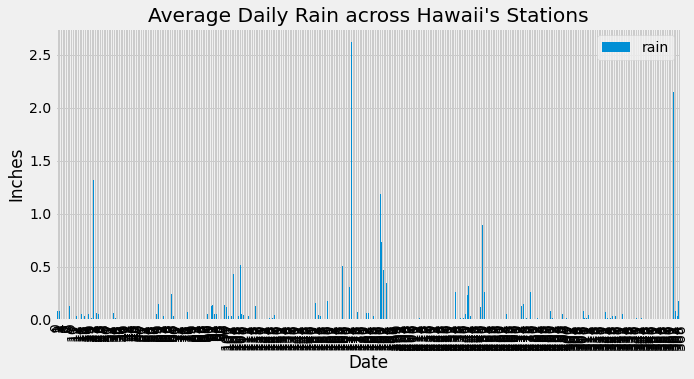

<IPython.core.display.Javascript object>

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df.plot(kind = "bar",
            title = "Average Daily Rain across Hawaii's Stations",
            figsize = (10, 5))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
new_df.describe()

,rain
count,365.000000
mean,0.051562
std,0.217487
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


<IPython.core.display.Javascript object>

In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(station.id).count()

9

<IPython.core.display.Javascript object>

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(measurement.station_id, func.count(measurement.id)).group_by(measurement.station_id).order_by(func.count(measurement.id).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

<IPython.core.display.Javascript object>

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = stations[0][0]
temp_record = session.query(func.min(measurement.temp), func.max(measurement.temp), func.avg(measurement.temp)).filter(measurement.station_id==most_active).first()
temp_record

(54.0, 85.0, 71.66378066378067)

<IPython.core.display.Javascript object>

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
temp_obs = session.query(measurement.temp).filter(measurement.station_id==most_active).filter(measurement.date>=start_date).all()
temp_obs
temp_df =pd.DataFrame(temp_obs, columns=["tobs"])
temp_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


<IPython.core.display.Javascript object>

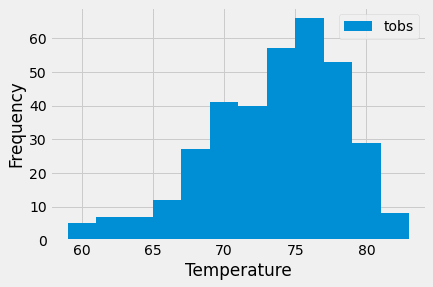

<IPython.core.display.Javascript object>

In [32]:
# plot the results as a histogram
temp_df.plot(
    kind = "hist",
    bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
